In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Load dataset
df =pd.read_csv('spam.csv', encoding='latin-1')
df =df[['v1','v2']]  # Keep only necessary columns
df.columns =['label','message']  # Rename for simplicity

In [33]:
#Label encoding: ham =0,spam =1
df['label'] =df['label'].map({'ham':0,'spam':1})

In [34]:
#Split data
X =df['message']
y =df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#Text vectorization using TF-IDF
vectorizer =TfidfVectorizer(stop_words='english')
X_train_tfidf =vectorizer.fit_transform(X_train)
X_test_tfidf =vectorizer.transform(X_test)

In [36]:
#Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [37]:
# Predictions and evaluation
y_pred =model.predict(X_test_tfidf)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9668161434977578

Confusion Matrix:
 [[965   0]
 [ 37 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



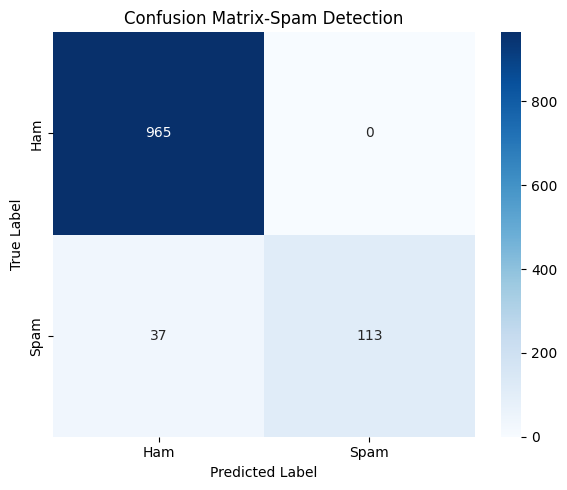

In [38]:
#plot
cm =confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])
plt.title('Confusion Matrix-Spam Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [40]:
# Manual message checking
def check_message_spam(message):
    # Vectorize the input message using the same TF-IDF vectorizer
    message_tfidf =vectorizer.transform([message])
    prediction =model.predict(message_tfidf)
    return "SPAM" if prediction[0]==1 else "Not Spam"
#Test manually
user_message =input("Enter a message to check if it's spam: ")
result =check_message_spam(user_message)
print("Prediction:", result)

Enter a message to check if it's spam: Dear Mahesh Sankar S,  Congratulations! You have been selected for the AICTE Oasis Infobyte Internship.  Welcome Letter: Check Your Offer Letter  Useful Links:  Task Submission Form: Submission Form Link Task List: Task List PDF Link FAQs: FAQ PDF Link Placement Support: Placement Support PDF Link Resume Building Training: YouTube.com/OasisInfobyte Important Links: Click Here We invite you to collaborate in open-source industry projects and gain real-world experience. For updates, join our community Telegram group here: https://t.me/oasisinfobyte  Internship Batch Details:  Project Kick-Off: Please begin your project as soon as possible. Start Date: 5th July 2025 Submission Deadline: 15th August 2025
Prediction: Not Spam
